- author: Macrina Lobo

In [1]:
library(ArchR)

#set threads to 1/2 of available cores (assuming each core has 2 threads)
addArchRThreads(threads = 8)

#set genome
addArchRGenome("mm10")

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [2]:
projFoxn1ko = loadArchRProject("/Users/LoboM/Documents/e11_12_analysis/ML_0414_no_dub")

ERROR: Error in loadArchRProject("/Users/LoboM/Documents/e11_12_analysis/ML_0414_no_dub"): Could not find previously saved ArchRProject in the path specified!


In [4]:
library(Seurat)


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




In [5]:
roadmap <- readRDS("~/Dropbox/shared_Bioinformatics/scrna_objects/10x_pharynx/whole_atlas_unfiltered.Robj")
updated_roadmap = Seurat::UpdateSeuratObject(object = roadmap)
rm(roadmap)
#updated_roadmap_rna@assays$RNA@counts
updated_roadmap$final_cluster %<>% (function(x) {x[is.na(x)] = "removed"; x})



Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



In [6]:
updated_roadmap$RNA

Assay data with 27998 features for 57850 cells
Top 10 variable features:
 Sgk3, Sulf1, Rdh10, Tfap2b, Tram2, Col9a1, Inpp4a, X2010300C02Rik,
Gm16152, Fhl2 

- deal with hyphen, dot eg Nkx2.1 and Nkx2-1

In [7]:
# this file has a list of gene names from the seurat object with relevant dots replaced by hyphens 
gene_names = read.table("./cleaned_rna_gene_names.txt", header = FALSE, sep = "", dec = ".")
tmp = as.vector(gene_names$V1)

In [8]:
RenameGenesSeurat <- function(obj = ls.Seurat[[i]], newnames = tmp) { # Replace gene names in different slots of a Seurat object. Run this before integration. Run this before integration. It only changes obj@assays$RNA@counts, @data and @scale.data.
  print("Run this before integration. It only changes obj@assays$RNA@counts and @data ")
  RNA <- obj@assays$RNA

  if (nrow(RNA) == length(newnames)) {
    if (length(RNA@counts)) RNA@counts@Dimnames[[1]]            <- newnames
    if (length(RNA@data)) RNA@data@Dimnames[[1]]                <- newnames
    # if (length(RNA@scale.data)) RNA@scale.data@Dimnames[[1]]    <- newnames
  } else {"Unequal gene sets: nrow(RNA) != nrow(newnames)"}
  obj@assays$RNA <- RNA
  return(obj)
}

In [9]:
# TEST 
tmp2 = updated_roadmap@assays$RNA@data@Dimnames[[1]] 
for (entry in 1:length(tmp)){
    # print(tmp[entry])
    # compare with actual
    if (tmp[entry] != tmp2[entry]){
        print(tmp2[entry])
    }
}

[1] "Rp1.1"
[1] "Krtap28.10"
[1] "Krtap28.13"
[1] "Zfp813.ps"
[1] "Gm15853.1"
[1] "Gm16701.1"
[1] "Olfr364.ps1"
[1] "Olfr1025.ps1"
[1] "Olfr1187.ps1"
[1] "Olfr1224.ps1"
[1] "RP23.336F11.36"
[1] "Olfr1284.1"
[1] "Olfr1309.1"
[1] "Olfr1315.ps1"
[1] "Olfr1316.1"
[1] "Nkx2.4"
[1] "Nkx2.2"
[1] "Nkx2.2os"
[1] "RP23.138J20.8"
[1] "RP23.109E24.10"
[1] "Spin2.ps6"
[1] "Btg1.ps1"
[1] "Btg1.ps2"
[1] "RP23.95K12.13"
[1] "Olfr1326.ps1"
[1] "RP23.9K14.6"
[1] "RP23.240M8.2"
[1] "RP23.466J17.3"
[1] "RP23.106P7.5"
[1] "Gm2464.1"
[1] "Mir124.2hg"
[1] "Schip1.1"
[1] "Sprr2j.ps"
[1] "Flg.1"
[1] "Flg.2"
[1] "Flg.3"
[1] "Flg.4"
[1] "Flg.5"
[1] "Flg.6"
[1] "Hist2h2bb.1"
[1] "Atg4a.ps"
[1] "Vma21.ps"
[1] "RP23.354H24.9"
[1] "Nkx1.1"
[1] "Nkx3.2"
[1] "Smim20.1"
[1] "Dancr.1"
[1] "Nkx6.1"
[1] "Gbp6.1"
[1] "D130017N08Rik.1"
[1] "Umad1.1"
[1] "Smkr.ps"
[1] "Olfr237.ps1"
[1] "RP23.205F19.4"
[1] "RP24.124B23.17"
[1] "RP24.124B23.14"
[1] "RP24.492L15.6"
[1] "RP23.276L17.2"
[1] "RP24.416M6.4"
[1] "RP24.416M6.5"
[1] "

In [10]:
updated_roadmap_clean = RenameGenesSeurat(updated_roadmap,tmp)

[1] "Run this before integration. It only changes obj@assays$RNA@counts and @data "


In [11]:
for (entry in updated_roadmap_clean@assays$RNA@data@Dimnames[[1]] ){
    if (grepl( '-', entry, fixed = TRUE)){
        print(entry)
    }
}

[1] "Rp1-1"
[1] "Krtap28-10"
[1] "Krtap28-13"
[1] "Zfp813-ps"
[1] "Gm15853-1"
[1] "Gm16701-1"
[1] "Olfr364-ps1"
[1] "Olfr1025-ps1"
[1] "Olfr1187-ps1"
[1] "Olfr1224-ps1"
[1] "RP23-336F11-36"
[1] "Olfr1284-1"
[1] "Olfr1309-1"
[1] "Olfr1315-ps1"
[1] "Olfr1316-1"
[1] "Nkx2-4"
[1] "Nkx2-2"
[1] "Nkx2-2os"
[1] "RP23-138J20-8"
[1] "RP23-109E24-10"
[1] "Spin2-ps6"
[1] "Btg1-ps1"
[1] "Btg1-ps2"
[1] "RP23-95K12-13"
[1] "Olfr1326-ps1"
[1] "RP23-9K14-6"
[1] "RP23-240M8-2"
[1] "RP23-466J17-3"
[1] "RP23-106P7-5"
[1] "Gm2464-1"
[1] "Mir124-2hg"
[1] "Schip1-1"
[1] "Sprr2j-ps"
[1] "Flg-1"
[1] "Flg-2"
[1] "Flg-3"
[1] "Flg-4"
[1] "Flg-5"
[1] "Flg-6"
[1] "Hist2h2bb-1"
[1] "Atg4a-ps"
[1] "Vma21-ps"
[1] "RP23-354H24-9"
[1] "Nkx1-1"
[1] "Nkx3-2"
[1] "Smim20-1"
[1] "Dancr-1"
[1] "Nkx6-1"
[1] "Gbp6-1"
[1] "D130017N08Rik-1"
[1] "Umad1-1"
[1] "Smkr-ps"
[1] "Olfr237-ps1"
[1] "RP23-205F19-4"
[1] "RP24-124B23-17"
[1] "RP24-124B23-14"
[1] "RP24-492L15-6"
[1] "RP23-276L17-2"
[1] "RP24-416M6-4"
[1] "RP24-416M6-5"
[1] "

- subset to E11-E12

In [12]:
seRNA_whole <- as.SingleCellExperiment(updated_roadmap_clean)
#seRNA
colnames(colData(seRNA_whole))
colData(seRNA_whole)$ident %<>% as.character 
table(colData(seRNA_whole)$ident)

[1] "orig.ident"    "eday"          "nUMI_mt"       "nUMI_rp"      
 [5] "nUMI_pct_mt"   "nUMI_pct_rp"   "mt_nUMI_pct"   "ribo_nUMI_pct"
 [9] "Y_genes"       "res.2"         "retained"      "final_cluster"
[13] "nCount_RNA"    "nFeature_RNA"  "ident"


   0    1   10   11   12   13   14   15   16   17   18   19    2   20   21   22 
3812 3130 1964 1845 1842 1779 1603 1599 1489 1434 1432 1427 2672 1365 1348 1242 
  23   24   25   26   27   28   29    3   30   31   32   33   34   35   36   37 
1188 1143 1104 1099  984  876  786 2535  562  505  494  459  426  383  381  332 
  38   39    4   40   41   42    5    6    7    8    9 
 247  231 2497  111   79   48 2467 2467 2276 2145 2042 

In [18]:
table(colData(seRNA_whole)$final_cluster)


      0       1      10      11      12      13      14      15      16      17 
   5387    3933    2060    1917    1817    1768    1735    1582    1557    1383 
     18      19       2      20      21      22      23      24      25      26 
   1227    1215    3262    1124    1098     936     902     859     524     450 
     27       3       4       5       6       7       8       9 removed 
    394    3156    2927    2873    2801    2661    2403    2093    3806 

In [13]:
seRNA_whole

class: SingleCellExperiment 
dim: 27998 57850 
metadata(0):
assays(2): counts logcounts
rownames(27998): Xkr4 Gm1992 ... Vmn2r122 CAAA01147332-1
rowData names(0):
colnames(57850): AAACCTGAGCCAACAG|CR_pharynx_E9_5_rep1
  AAACCTGCAACGATCT|CR_pharynx_E9_5_rep1 ...
  TTTGTCATCTGATACG|CR_pharynx_E12_5_rep2
  TTTGTCATCTGGTGTA|CR_pharynx_E12_5_rep2
colData names(15): orig.ident eday ... nFeature_RNA ident
reducedDimNames(4): PCA TSNE UMAP UMAP_FINAL
spikeNames(0):
altExpNames(0):

In [14]:
# Load figure 1 cluster colors 
fig1_clusters = read.csv("/Users/LoboM/Documents/ArchR_Analysis//fig1_cluster_names_simple.csv", stringsAsFactors = F)
fig1_colors = setNames(fig1_clusters$colour, fig1_clusters$cell_type) %>% c("removed"="black")






- test that the embedding is correct

In [15]:
p1_2 <- plotEmbedding(ArchRProj = projFoxn1ko, size = 1.0,colorBy = "cellColData", name = "Sample", embedding = "UMAP_test")

plotPDF(p1_2, name = "test_sample.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-e22e7ebbfe6b-Date-2021-05-17_Time-16-36-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-e22e7ebbfe6b-Date-2021-05-17_Time-16-36-57.log

Plotting Ggplot!



- redo the integration

In [17]:
projFoxn1ko


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /Users/LoboM/Documents/e11_12_analysis/ML_0414_no_dub 
samples(4): e11_5rep1 e12_5rep2 e12_5rep1 e11_5rep2
sampleColData names(1): ArrowFiles
cellColData names(23): Sample TSSEnrichment ... predictedGroup_unfil
  predictedScore_unfil
numberOfCells(1): 13396
medianTSS(1): 15.555
medianFrags(1): 26351.5

In [19]:
projFoxn1ko <- addGeneIntegrationMatrix(
    ArchRProj = projFoxn1ko, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix_unfil_clean",
    reducedDims = "IterativeLSI_test",
    seRNA = seRNA_whole,
    sampleCellsATAC = nCells(projFoxn1ko),sampleCellsRNA=dim(seRNA_whole)[2],
    addToArrow = TRUE,
    groupRNA = "final_cluster",#groupATAC='Harmony_Replicate_Clusters_1.4',
    nameCell = "predictedCell_unfil_clean",
    nameGroup = "predictedGroup_unfil_clean",
    nameScore = "predictedScore_unfil_clean",force=TRUE
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-e22e52207a00-Date-2021-05-17_Time-16-39-40.log
If there is an issue, please report to github with logFile!

2021-05-17 16:39:40 : Running Seurat's Integration Stuart* et al 2019, 0.006 mins elapsed.

2021-05-17 16:39:47 : Checking ATAC Input, 0.131 mins elapsed.

2021-05-17 16:39:47 : Checking RNA Input, 0.131 mins elapsed.

2021-05-17 16:40:00 : Found 20165 overlapping gene names from gene scores and rna matrix!, 0.335 mins elapsed.

2021-05-17 16:40:00 : Creating Integration Blocks, 0.335 mins elapsed.

2021-05-17 16:40:01 : Prepping Interation Data, 0.355 mins elapsed.

2021-05-17 16:40:01 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2021-05-17 16:40:01 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2021-05-17 16:40:28 : Block (1 of 1) : Identifying Variable Genes, 0.438 mins elapsed.

2021-05-17 16:41:28 : Block (1 of 1) : Getting GeneScoreMatrix, 1.449 mins elapsed.

2021-05-17 16:41:56 :

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


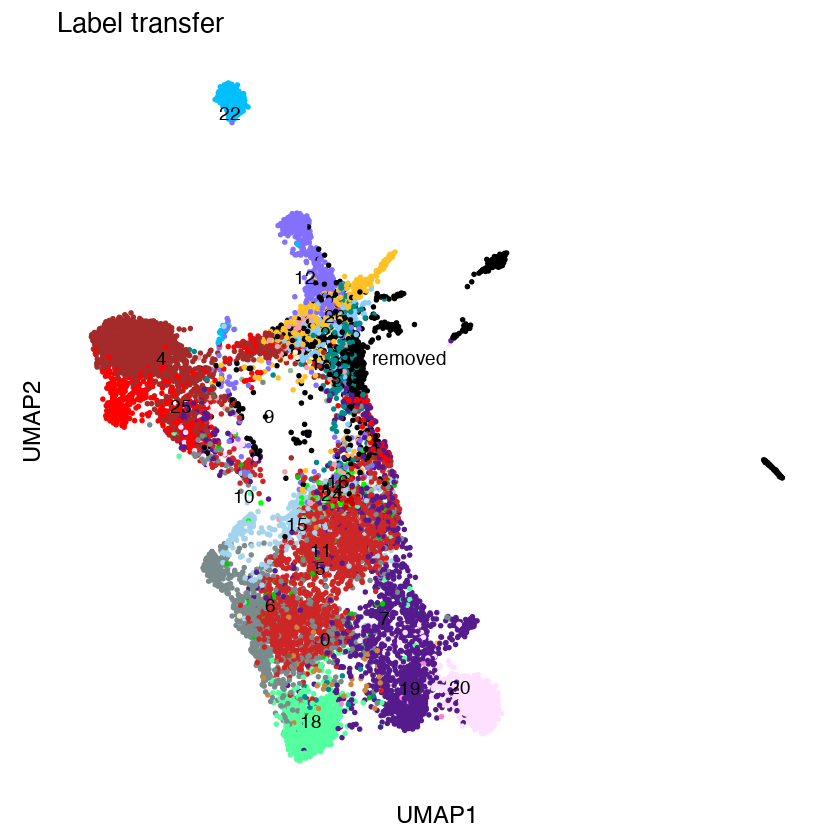

Plotting Ggplot!

Plotting Patchwork!



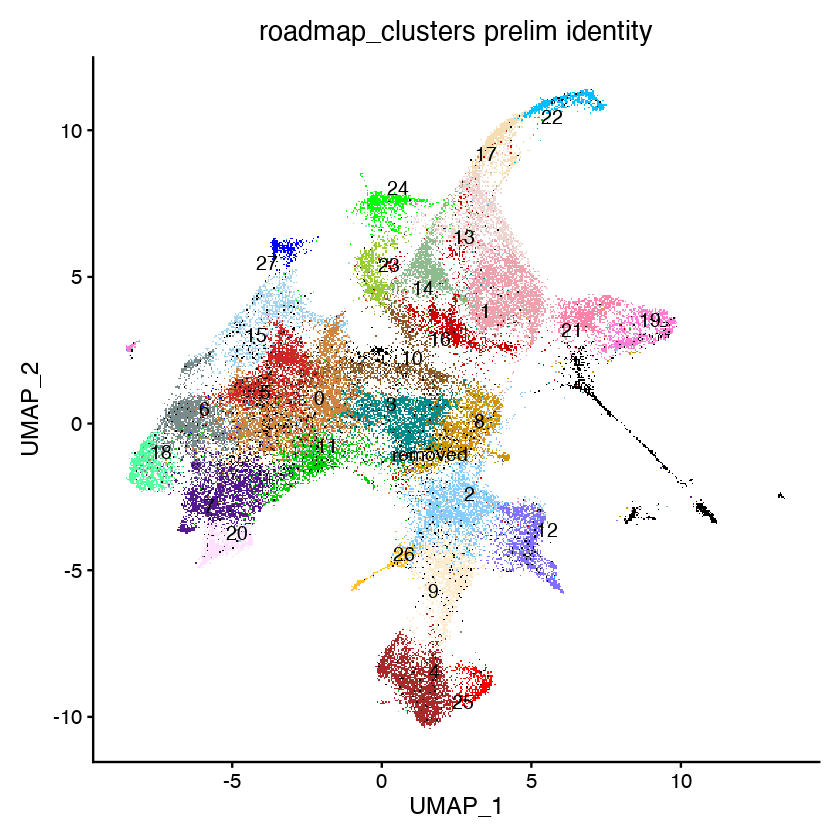

In [20]:
# Plot label transfer
X = data.frame(projFoxn1ko@embeddings$UMAP_test[[1]], projFoxn1ko$predictedGroup_unfil_clean) %>% 
  set_colnames(c("UMAP1", "UMAP2", "transferred_label_Un_whole_fil")) 
p1 <- ggplot(X) + 
  geom_point(aes(x = UMAP1, y = UMAP2, colour = transferred_label_Un_whole_fil), size = 0.5) + 
  geom_text(data = aggregate(X[1:2], X[3], mean), 
            aes(x = UMAP1, y = UMAP2, label = transferred_label_Un_whole_fil)) + 
  scale_color_manual(values = fig1_colors) + 
  cowplot::theme_cowplot() + coord_fixed() + 
  ggtitle("Label transfer") + 
  theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), legend.position = "none")
p1
p2 <- DimPlot(updated_roadmap_clean, group.by = 'final_cluster', label = TRUE, cols= fig1_colors ,repel = TRUE) + NoLegend() + ggtitle('roadmap_clusters prelim identity')
p2
plotPDF(p1,p2, name = "FigS3c.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)

In [22]:
projFoxn1ko <- addClusters(
    input = projFoxn1ko,
    reducedDims = "IterativeLSI_test",
    method = "Seurat",
    name = "Clusters_test_4",
    resolution = 4.0, force=TRUE, maxClusters=100
)

ArchR logging to : ArchRLogs/ArchR-addClusters-e22e1ff5b175-Date-2021-05-18_Time-09-43-43.log
If there is an issue, please report to github with logFile!

2021-05-18 09:43:43 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13396
Number of edges: 555545

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7157
Number of communities: 44
Elapsed time: 1 seconds


2 singletons identified. 42 final clusters.

2021-05-18 09:44:16 : Testing Biased Clusters, 0.553 mins elapsed.

2021-05-18 09:44:16 : Testing Outlier Clusters, 0.557 mins elapsed.

2021-05-18 09:44:16 : Assigning Cluster Names to 42 Clusters, 0.557 mins elapsed.

2021-05-18 09:44:16 : Finished addClusters, 0.558 mins elapsed.



In [23]:
p1_2 <- plotEmbedding(ArchRProj = projFoxn1ko, size = 1.0,colorBy = "cellColData", name = "Clusters_test_4", embedding = "UMAP_test")

plotPDF(p1_2, name = "test_Clusters_test_4.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)




ArchR logging to : ArchRLogs/ArchR-plotEmbedding-e22e18a2ab0a-Date-2021-05-18_Time-09-44-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-e22e18a2ab0a-Date-2021-05-18_Time-09-44-36.log

Plotting Ggplot!



- make sure Cluster resolution 4 exists

Plotting Other



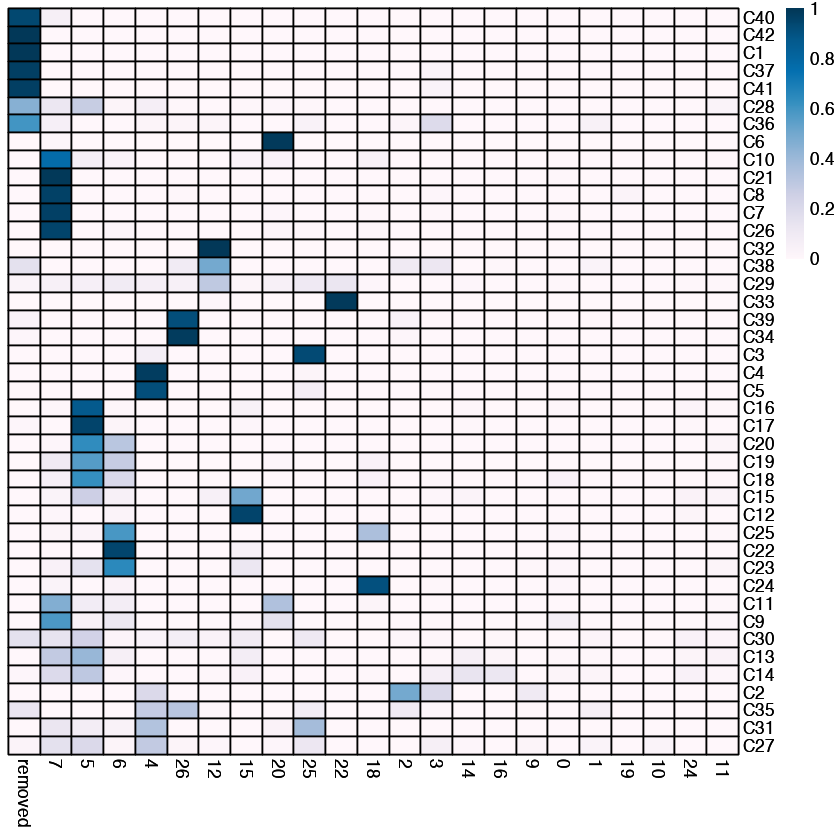

In [24]:
cM <- as.matrix(confusionMatrix(projFoxn1ko$Clusters_test_4, projFoxn1ko$predictedGroup_unfil_clean))
library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black",treeheight_row=0,treeheight_col=0
)
p
plotPDF(p, name = "FigS3d.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 5, height = 5)

In [27]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:data.table’:

    between, first, last


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal

In [30]:
saveArchRProject(ArchRProj = projFoxn1ko, outputDirectory = "../ML_0414_no_dub", load = FALSE)

Saving ArchRProject...



Length of unique values greater than palette, interpolating..

Plotting Ggplot!



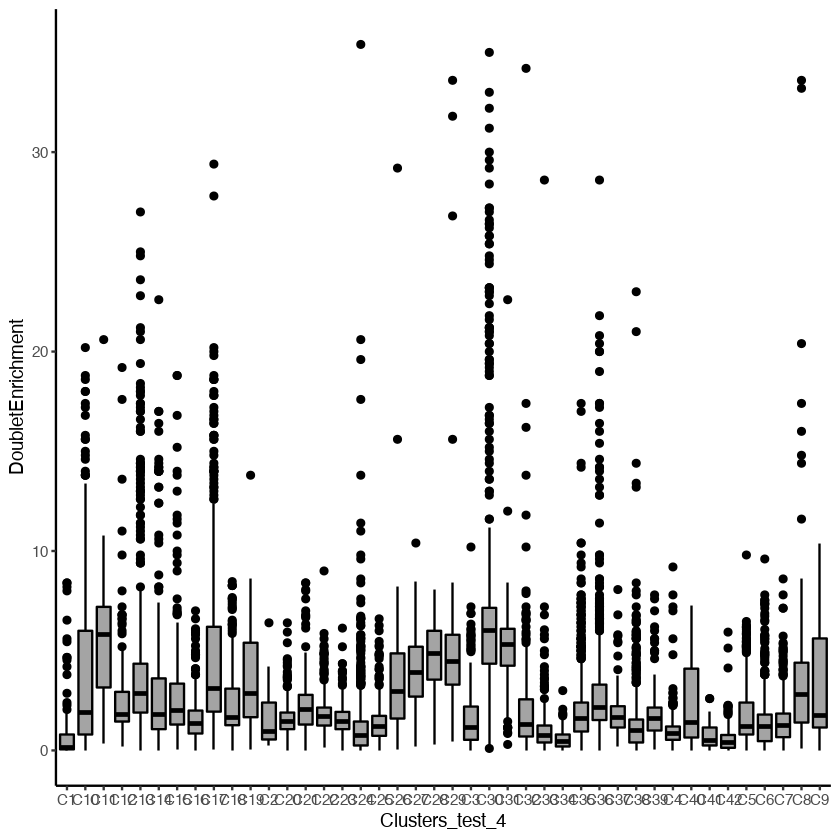

In [29]:
pal=paletteDiscrete(projFoxn1ko$Clusters_test_4)

a <- as.data.frame(getCellColData(projFoxn1ko, select = c("Clusters_test_4", "DoubletEnrichment"))) %>% set_colnames(c("Clusters_test_4", "DoubletEnrichment"))
rownames(a) <- NULL

ggplot(a, aes(x=Clusters_test_4, y=DoubletEnrichment)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
# Change box plot colors by groups
p<-ggplot(a, aes(x=reorder(Clusters_test_4,DoubletEnrichment,median), y=DoubletEnrichment, fill=Clusters_test_4)) +
  geom_boxplot()
# aes(x=reorder(carrier,speed), y=speed)
tmp_a = a %>% dplyr::group_by(Clusters_test_4) %>% summarise(median_DoubletEnrichment = median(DoubletEnrichment)) # %>% arrange(med(DoubletEnrichment))

y_int = mean(tmp_a$median_DoubletEnrichment) + 1*sd(tmp_a$median_DoubletEnrichment)

p <- p + scale_fill_manual(values=pal) + geom_hline(yintercept = y_int) + theme(legend.position="none") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab("Clusters")

plotPDF(p, name = "FigS3e.pdf", ArchRProj = projFoxn1ko, addDOC = FALSE, width = 8, height = 8)




In [3]:
projFoxn1ko2 = loadArchRProject("../ML_0414_no_dub")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
projFoxn1ko2


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /Users/LoboM/Documents/e11_12_analysis/ML_0414_no_dub 
samples(4): e11_5rep1 e12_5rep2 e12_5rep1 e11_5rep2
sampleColData names(1): ArrowFiles
cellColData names(27): Sample TSSEnrichment ...
  predictedScore_unfil_clean Clusters_test_4
numberOfCells(1): 13396
medianTSS(1): 15.555
medianFrags(1): 26351.5

In [5]:
projFoxn1ko5 = projFoxn1ko2[projFoxn1ko2$Clusters_test_4 !="C36" & 
                         projFoxn1ko2$Clusters_test_4 !="C37" & 
                         projFoxn1ko2$Clusters_test_4 !="C1" & 
                         projFoxn1ko2$Clusters_test_4 !="C42" & 
                         projFoxn1ko2$Clusters_test_4 !="C40" & 
                         projFoxn1ko2$Clusters_test_4 !="C41" & 
                         projFoxn1ko2$Clusters_test_4 !="C31" & 
                         projFoxn1ko2$Clusters_test_4 !="C30" &
                         projFoxn1ko2$Clusters_test_4 !="C11" & 
                         projFoxn1ko2$Clusters_test_4 !="C27" &
                         projFoxn1ko2$Clusters_test_4 !="C28" &
                         projFoxn1ko2$Clusters_test_4 !="C29"]

In [6]:
projFoxn1ko5


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /Users/LoboM/Documents/e11_12_analysis/ML_0414_no_dub 
samples(4): e11_5rep1 e12_5rep2 e12_5rep1 e11_5rep2
sampleColData names(1): ArrowFiles
cellColData names(27): Sample TSSEnrichment ...
  predictedScore_unfil_clean Clusters_test_4
numberOfCells(1): 10890
medianTSS(1): 15.851
medianFrags(1): 24133

In [7]:
saveArchRProject(ArchRProj = projFoxn1ko5, outputDirectory = "ML_0414_no_dub_no_contam_with_res_4.0", load = FALSE)

Copying ArchRProject to new outputDirectory : /Users/LoboM/Documents/e11_12_analysis/notebooks/ML_0414_no_dub_no_contam_with_res_4.0

Copying Arrow Files...

Copying Arrow Files (1 of 4)

Copying Arrow Files (2 of 4)

Copying Arrow Files (3 of 4)

Copying Arrow Files (4 of 4)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 8): e11_5rep1

Copying Other Files (2 of 8): e11_5rep2

Copying Other Files (3 of 8): e12_5rep1

Copying Other Files (4 of 8): e12_5rep2

Copying Other Files (5 of 8): Embeddings

Copying Other Files (6 of 8): IterativeLSI_test

Copying Other Files (7 of 8): Plots

Copying Other Files (8 of 8): RNAIntegration

Saving ArchRProject...

